In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
import re
import os
import matplotlib.pyplot as plt
sns.set(style="ticks")

import sklearn as sk
from scipy import stats
from sklearn import preprocessing

In [ ]:
# Load data
import csv
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
import pandas
df = pd.read_csv('/content/gdrive/MyDrive/bank.csv',sep = ';')
df.head(5)
print(df.shape)
df.info()
df.describe()


Mounted at /content/gdrive
(4521, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


/tmp/ipython-input-2340554184.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(count_number_susbc,palette=palette)


<Axes: xlabel='y', ylabel='count'>

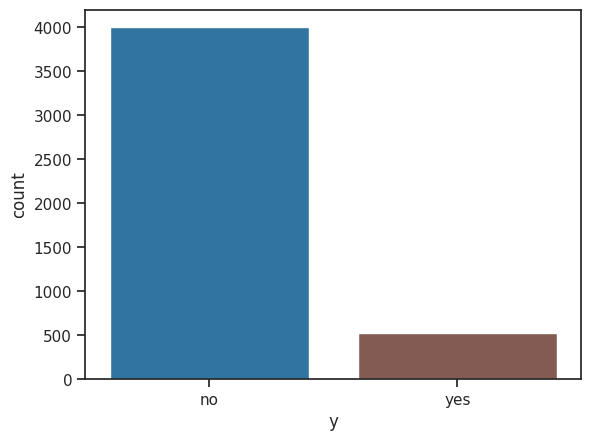

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
count_number_susbc = df["y"].value_counts()
count_number_susbc.index
count_number_susbc.values
df['y'].value_counts()
palette = {
    'no': 'tab:blue',
    'yes': 'tab:brown',
}
sns.barplot(count_number_susbc,palette=palette)

/tmp/ipython-input-2435199699.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'], hist=True, kde=False,


<Axes: xlabel='age'>

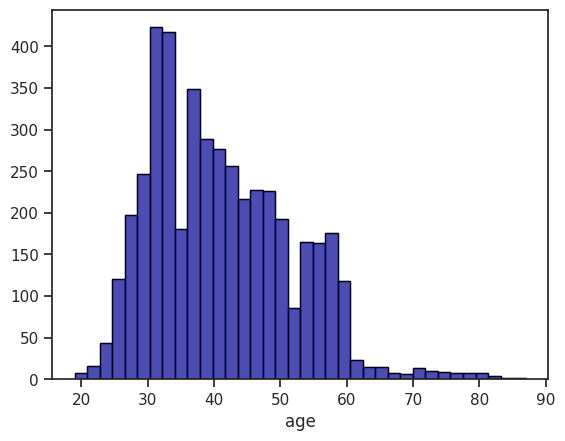

In [ ]:
# histogram for age (using matplotlib)
plt.hist(df['age'], color = 'grey', edgecolor = 'black',
         bins = int(180/5))

# histogram for age (using seaborn)
sns.distplot(df['age'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

/tmp/ipython-input-1430438160.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['balance'], hist=True, kde=False,


<Axes: xlabel='balance'>

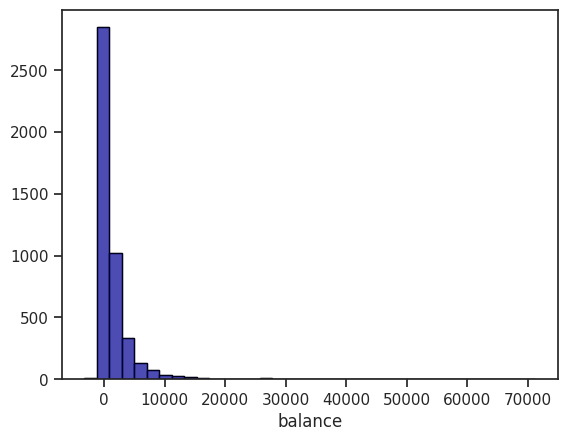

In [ ]:
# histogram for balance (using matplotlib)
plt.hist(df['balance'], color = 'grey', edgecolor = 'black',
         bins = int(180/5))

# histogram for balance (using seaborn)
sns.distplot(df['balance'], hist=True, kde=False,
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})


/tmp/ipython-input-709676319.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(count_number_susbc,palette='Set1')


,count
education,
secondary,2306
tertiary,1350
primary,678
unknown,187


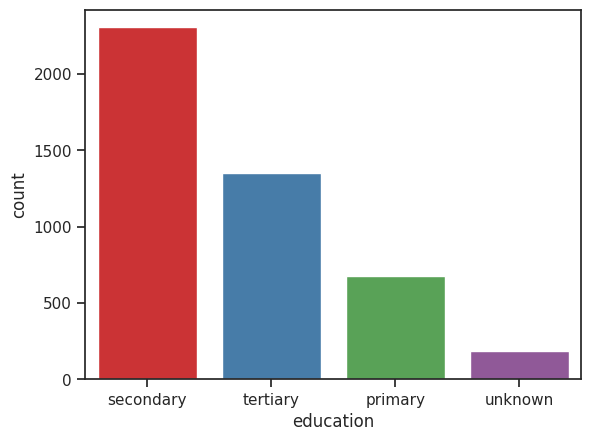

In [ ]:
# barplot for the variable 'education'
count_number_susbc = df["education"].value_counts()
sns.barplot(count_number_susbc,palette='Set1')

df['education'].value_counts()

/tmp/ipython-input-3597513846.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(count_number_susbc,palette='Set2')


,count
education,
secondary,2306
tertiary,1350
primary,678
unknown,187


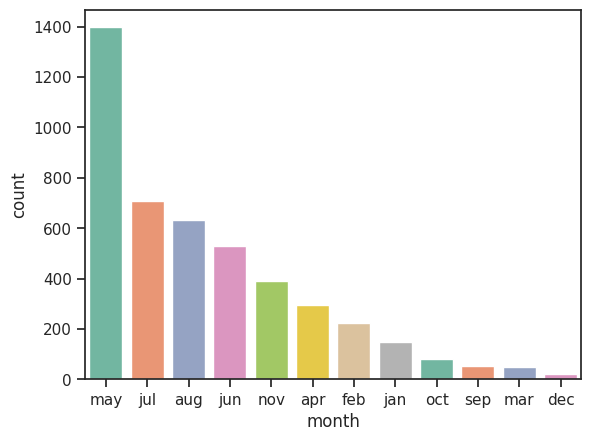

In [ ]:
count_number_susbc = df["month"].value_counts()
sns.barplot(count_number_susbc,palette='Set2')

df['education'].value_counts()

Text(0.5, 1.0, 'Histogram for Yes and No Events w.r.t. IV')

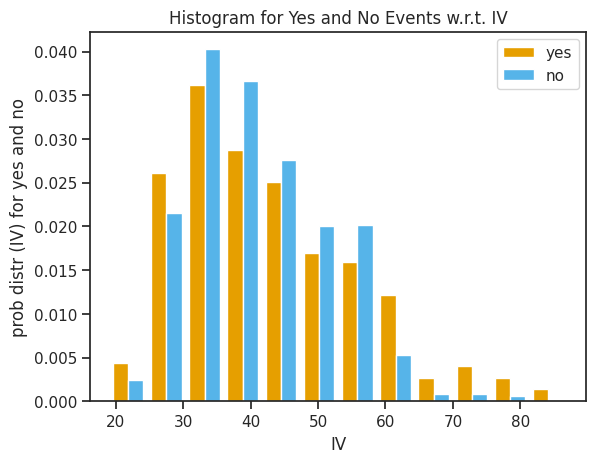

In [ ]:
# generate separate list for each subscription type for age

x1 = list(df[df['y'] == 'yes']['age'])
x2 = list(df[df['y'] == 'no']['age'])

# assign colors for each subscription type
colors = ['#E69F00', '#56B4E9']
names = ['yes', 'no']

# plot the histogram
plt.hist([x1, x2], bins = int(180/15), density=True,
         color = colors, label=names)

# plot formatting
plt.legend()
plt.xlabel('IV')
plt.ylabel('prob distr (IV) for yes and no')
plt.title('Histogram for Yes and No Events w.r.t. IV')

<Axes: xlabel='month'>

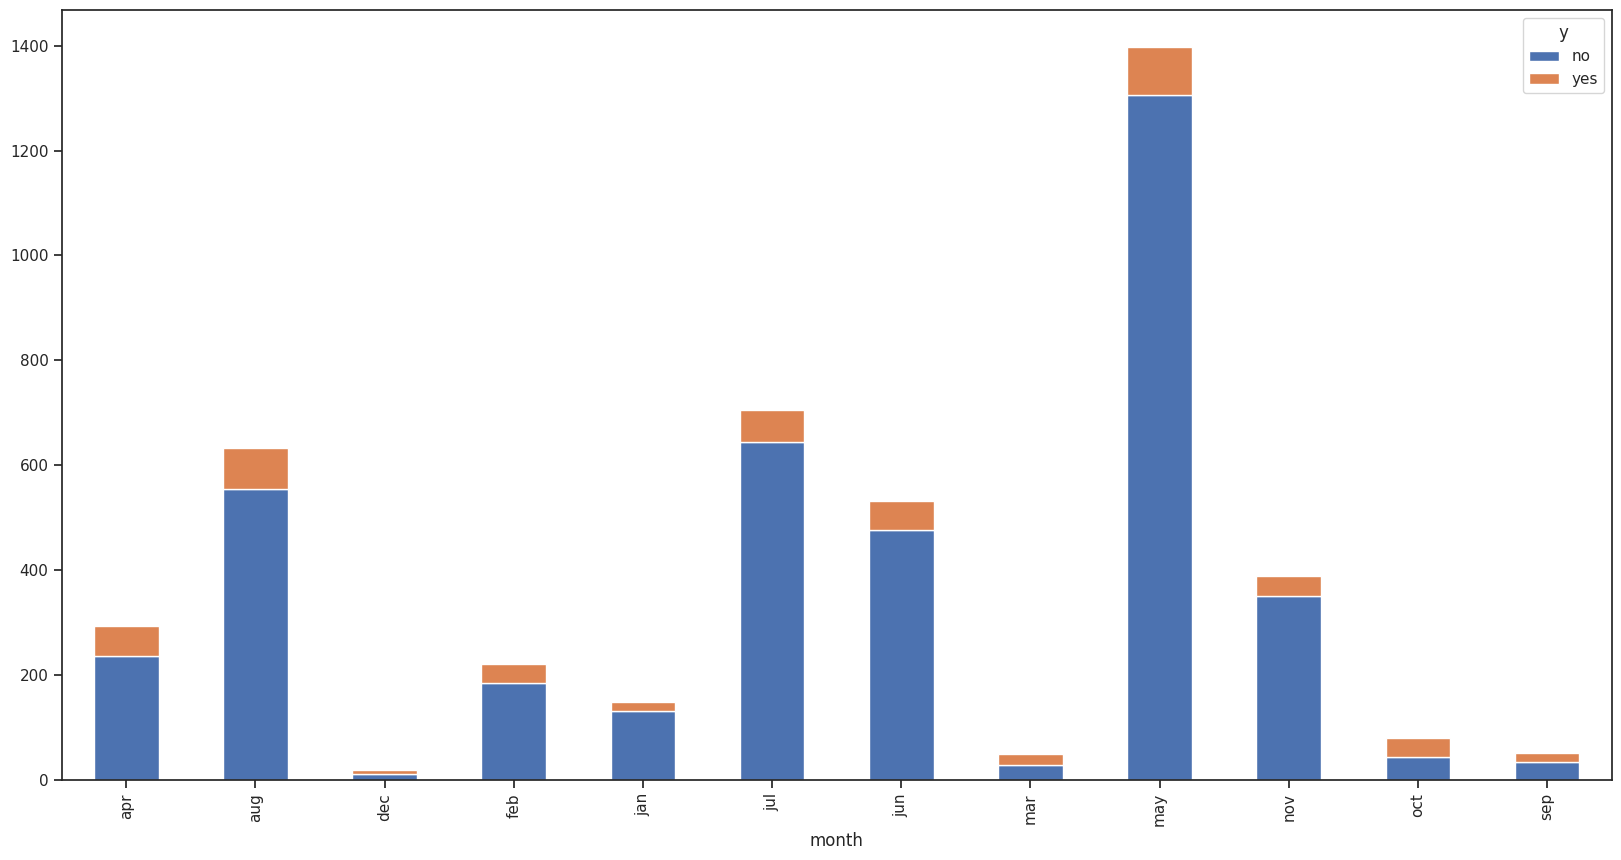

In [ ]:
df.groupby(["month", "y"]).size().unstack().plot(kind='bar', stacked=True, figsize=(20,10))

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
import re
import os
import matplotlib.pyplot as plt
sns.set(style="ticks")



# read the downloaded input data (marketing data)
df = pd.read_csv('https://raw.githubusercontent.com/mertcank1/BDA/refs/heads/main/bank.csv', sep=';')

#df['y'].replace(['yes','no'],[1,0],inplace=True)
#df['default'].replace(['yes','no'],[1,0],inplace=True)
#df['housing'].replace(['yes','no'],[1,0],inplace=True)
#df['loan'].replace(['yes','no'],[1,0],inplace=True)

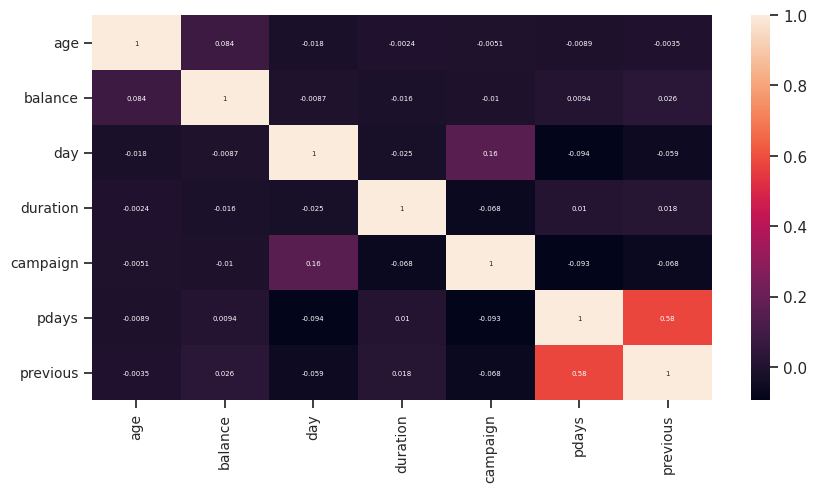

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pl
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr(method='pearson')
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':5})
heat_map=plt.gcf(); heat_map.set_size_inches(10,5)
plt.xticks(fontsize=10); plt.yticks(fontsize=10); plt.show()

df


<Axes: >

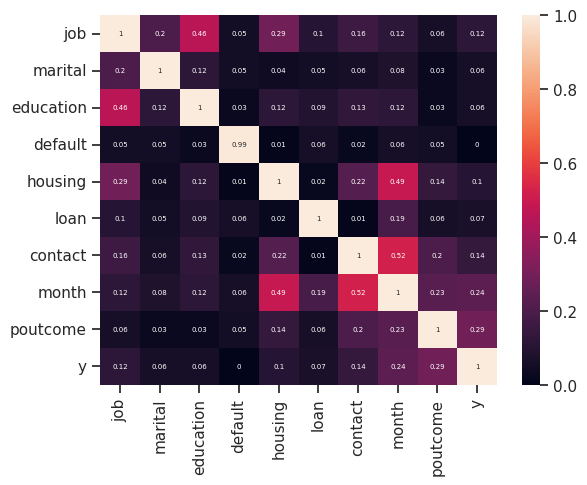

In [ ]:

from scipy.stats import chi2_contingency
import numpy as np
categorical_df = df.select_dtypes(include=['object', 'category'])
categorical_df

from scipy.stats import chi2_contingency
import numpy as np
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame()

for i in categorical_df.columns :
  data_encoded[i]=label.fit_transform(categorical_df[i])


def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return np.sqrt(stat/(obs*mini))
rows= []
for var1 in data_encoded:
  col = []
  for var2 in data_encoded :
    cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V
  rows.append(col)
cramers_results = np.array(rows)
dfc = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)
dfc

sns.heatmap(dfc, xticklabels=data_encoded.columns, yticklabels=data_encoded.columns, annot = True, annot_kws={'size':5})



In [ ]:
!pip install boruta

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 2.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
import boruta
# transform all categorical data types to integers (hot-encoding)
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes

# generate separate dataframes for IVs and DV (target variable)
X = df.drop(['y'], axis=1).values
Y = df['y'].values

# build RandomForestClassifier, Boruta models and
# related parameter
rfc = RandomForestClassifier(n_estimators=200, n_jobs=4, class_weight='balanced', max_depth=6)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2)
n_train = len(X)

# fit Boruta algorithm
boruta_selector.fit(X, Y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	6
Iteration: 	9 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	6
Iteration: 	10 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	6
Iteration: 	11 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	6
Iteration: 	12 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	7
Iteration: 	13 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	7
Iteration: 	14 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	7
Iteration: 	15 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	7
Iteration: 	16 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	7
Iteration:

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=6,
                                          n_estimators=70, n_jobs=4,
                                          random_state=RandomState(MT19937) at 0x788FC00DE640),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x788FC00DE640, verbose=2)

,features,rank
0,age,1
1,balance,1
2,previous,1
3,poutcome,1
4,pdays,1
5,duration,1
6,month,1
7,contact,1
8,housing,2
9,day,3


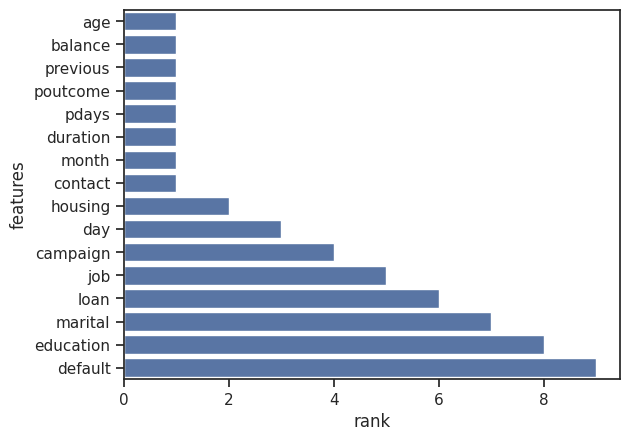

In [ ]:
feature_df = pd.DataFrame(df.drop(['y'], axis=1).columns.tolist(), columns=['features'])
feature_df['rank']=boruta_selector.ranking_
feature_df = feature_df.sort_values('rank', ascending=True).reset_index(drop=True)
sns.barplot(x='rank',y='features',data=feature_df)
feature_df

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
import re
import os
import matplotlib.pyplot as plt
sns.set(style="ticks")

import sklearn as sk
from scipy import stats
from sklearn import preprocessing

df = pd.read_csv('https://raw.githubusercontent.com/TrainingByPackt/Big-Data-Analysis-with-Python/master/Lesson07/Dataset/bank.csv', sep=';')

numeric_df = df._get_numeric_data()
numeric_df.head()


,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0


In [ ]:
numeric_df_array = np.array(numeric_df) # converting to numpy arrays for more efficient computation

loop_c = -1
col_for_normalization = list()

for column in numeric_df_array.T:
    loop_c+=1
    x = column
    k2, p = stats.normaltest(x)
    alpha = 0.001
    print("p = {:g}".format(p))

    # rules for printing the normality output
    if p < alpha:
        test_result = "non_normal_distr"
        col_for_normalization.append((loop_c)) # applicable if yeo-johnson is used

        #if min(x) > 0: # applicable if box-cox is used
            #col_for_normalization.append((loop_c)) # applicable if box-cox is used
        print("The null hypothesis can be rejected: non-normal distribution")

    else:
        test_result = "normal_distr"
        print("The null hypothesis cannot be rejected: normal distribution")

p = 1.98749e-70
The null hypothesis can be rejected: non-normal distribution
p = 0
The null hypothesis can be rejected: non-normal distribution
p = 3.08647e-278
The null hypothesis can be rejected: non-normal distribution
p = 0
The null hypothesis can be rejected: non-normal distribution
p = 0
The null hypothesis can be rejected: non-normal distribution
p = 0
The null hypothesis can be rejected: non-normal distribution
p = 0
The null hypothesis can be rejected: non-normal distribution


<Axes: ylabel='Density'>

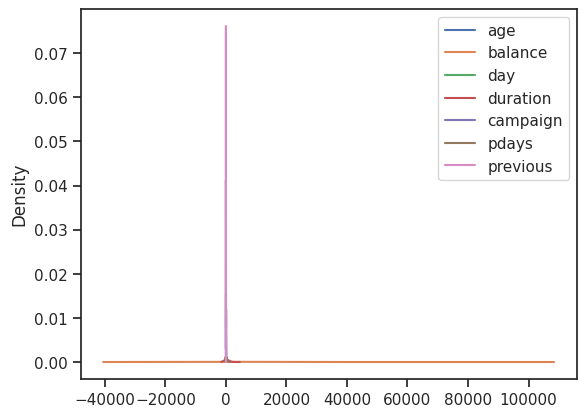

In [ ]:
columns_to_normalize = numeric_df[numeric_df.columns[col_for_normalization]]
names_col = list(columns_to_normalize)

# density plots of the features to check the normality
columns_to_normalize.plot.kde(bw_method=3)

<Axes: ylabel='Density'>

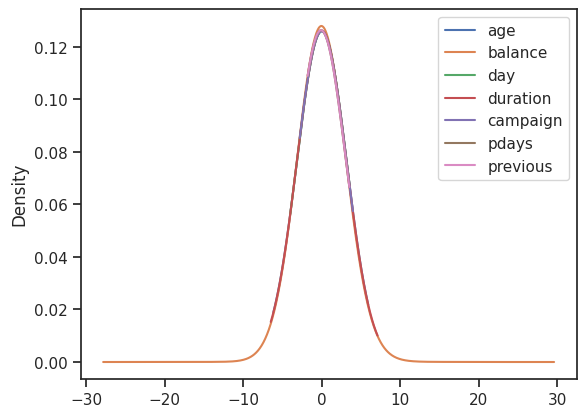

In [ ]:
pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=True, copy=True)
normalized_columns = pt.fit_transform(columns_to_normalize)
normalized_columns = pd.DataFrame(normalized_columns, columns=names_col)
normalized_columns.plot.kde(bw_method=3)